<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/background_cosmology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install camb

     |████████████████████████████████| 32.0MB 138kB/s 
  Created wheel for camb: filename=camb-1.1.0-cp36-none-any.whl size=912758 sha256=4045cd9db1ece8c9f23c15e5aef524a1cd2fd1aa37a051d3944b6ede3555ef11
  Stored in directory: /root/.cache/pip/wheels/52/d0/76/aea0e7192efbc373eaec579a4d18909518a90a6cc10f07625b
Successfully built camb


In [0]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb

**Specify the cosmology**

In [127]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

# Set within CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
results = camb.get_background(pars)
print("The age of the Universe (in Gyr) is:") 
print(camb.get_age(pars))
print("The comoving radius of the observable Universe (in Mpc) is:")
print(results.comoving_radial_distance(10000))


The age of the Universe (in Gyr) is:
13.783830906994758
The comoving radius of the observable Universe (in Mpc) is:
14103.519050987794


**Calculate distances as a function of redshift**

Text(0.5, 1.0, 'Distances')

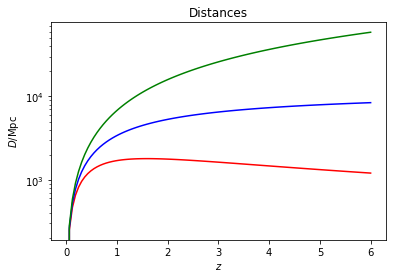

In [128]:
z = np.linspace(0,6,100)
DA = results.angular_diameter_distance(z)
DC = results.comoving_radial_distance(z)
DL = results.luminosity_distance(z)
plt.semilogy(z, DA,'r')
plt.semilogy(z, DC, 'b')
plt.semilogy(z, DL, 'g')
plt.xlabel('$z$')
plt.ylabel(r'$D /\rm{Mpc}$')
plt.title('Distances')

**Density fractions as a function of redshift, $\Omega_i (z)$.**

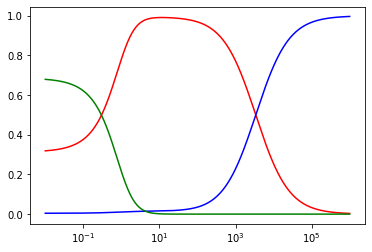

In [129]:
z = np.logspace(-2,6,5000)
omega_matter = results.get_Omega('cdm', z)+results.get_Omega('baryon', z)
omega_rad = results.get_Omega('photon', z)+3.*results.get_Omega('nu', z)
omega_DE = results.get_Omega('de', z)
plt.semilogx(z, omega_matter,'r')
plt.semilogx(z, omega_rad,'b')
plt.semilogx(z, omega_DE,'g')

**Compare the evolution of photons and neutrinos**

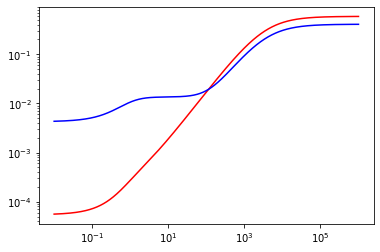

In [130]:
z = np.logspace(-2,6,5000)
omega_gamma = results.get_Omega('photon', z)
omega_neutrino = 3.*results.get_Omega('nu', z)
plt.loglog(z, omega_gamma,'r')
plt.loglog(z, omega_neutrino,'b')

In [94]:
results.get_derived_params()

{'DAstar': 13.86602036386725,
 'age': 13.783830906994758,
 'kd': 0.14092281604860044,
 'keq': 0.010386059419587947,
 'rdrag': 147.06067922883494,
 'rstar': 144.41117257781698,
 'thetad': 0.16077433649475187,
 'thetaeq': 0.8135311484213795,
 'thetarseq': 0.4495078339106119,
 'thetastar': 1.0414752667905396,
 'zdrag': 1060.005648472675,
 'zeq': 3402.9222390013024,
 'zstar': 1089.8787915970674}